# Titanic

- 데이터: [Kaggle의 Titanic](https://www.kaggle.com/c/titanic)
- 필사 참조: [이유한님 블로그](https://kaggle-kr.tistory.com/17)

### Description
1912년 4월 15일 발생한 unsinkable RMS Titanic sank에서 많은 인명 사고가 발생했는데, <br/>
question: **"what sorts of people were more likley to survive"**

<br/>

데이터 구성: `train.csv`, `test.csv`
- `train.csv`: ground truth
- `test.csv`: 살았는지 죽었는지 예측해야 할 데이터

### 진행 방향
1. 데이터셋 확인
2. EDA (Exploratory data analysis)
3. Feature Engineering
4. Modeling
5. Train & Prediction
6. Evaluate Model

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. 데이터셋 불러오기

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId
- Survived: 생존(1), 생존 못함(0)
- Pclass: 1st, 2nd, 3rd
- Name
- Sex
- Age
- SibSp: # of siblings/spouses(배우자)
- Parch: # of parents/children
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation(탑승); C, Q, S

In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> target data는 `Survived`

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> `age`, `Cabin`, `Embarked`(2) 에 null data 존재 유

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


> `age`, `Fare`(1), `Cabin`에 null data 존재 유

### 1.1 Null data 확인

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
for col in df_train.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:   Survived	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 19.87%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.00%
columns:      Cabin	 Percent of NaN value: 77.10%
columns:   Embarked	 Percent of NaN value: 0.22%


In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 20.57%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.24%
columns:      Cabin	 Percent of NaN value: 78.23%
columns:   Embarked	 Percent of NaN value: 0.00%


> 공통적으로 `Age`, `Cabin`에서 높은 null 값 발견
> - 특히 `Cabin`은 80%에 육박>
> - 추가적으로 train은 `Embarked`, test은 `Fare`에 일부 결측치가 존재.

<AxesSubplot:>

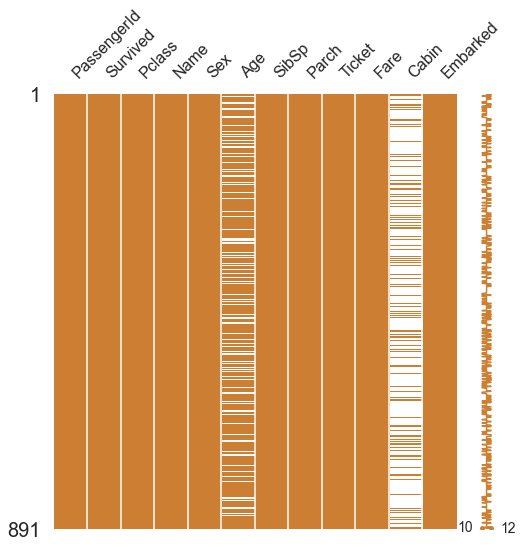

In [11]:
# 결측치 시각화: msno 라이브러리ㅇ
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

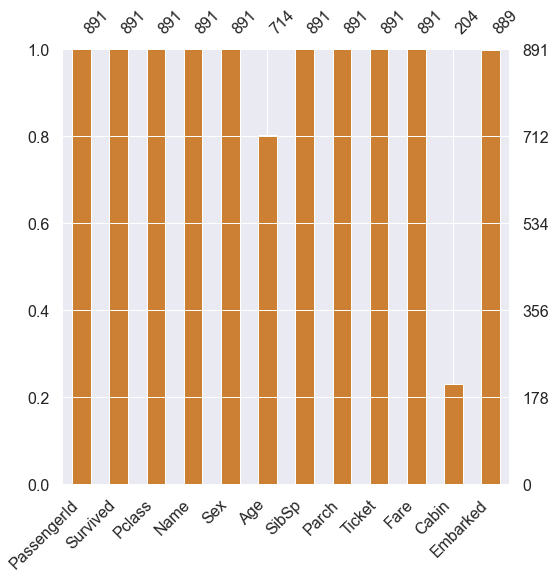

In [12]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2 Target label 확인
- target label이 어떤 분포를 갖는지 확인해보기

> **`Pie plot`**
> - matplotlib.pyplot의 pie() 함수
> - explode: 부채꼴이 중심에서 벗어나는 정도
> - autopct: 부채꼴 안에 표시될 숫자의 형식 (소수점 몇 자리 수)

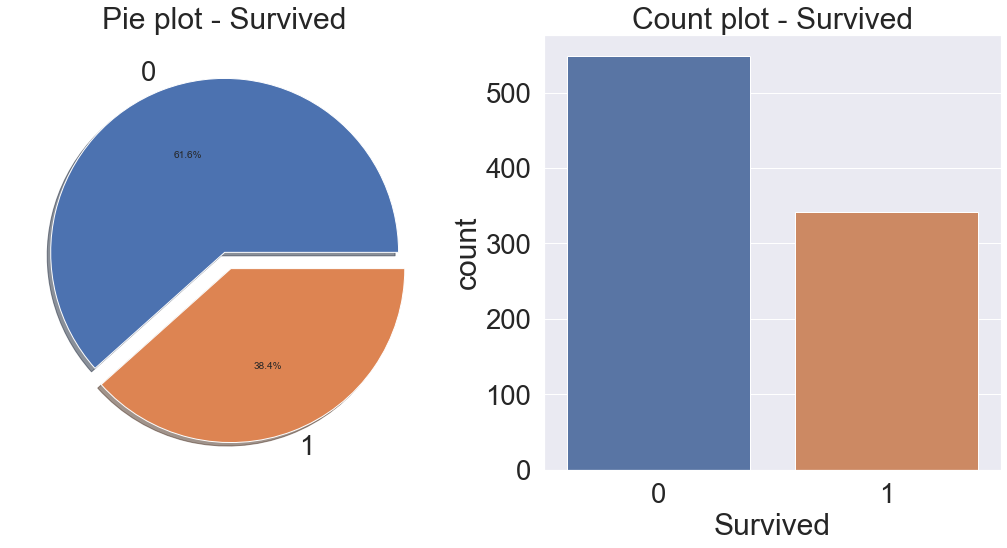

In [39]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

> - 산 사람(1)보다 죽은 사람(0)이 많다.
> - 38.4%가 살아남았는데, 꽤나 balanced한 데이터이다.

***

## 2. EDA (Exploratory Data Analysis)
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등

### 2.1 Pclass
- 카테고리이며 순서가 있는 데이터 타입 (1, 2, 3)
- `Pclass`, `Survived`를 가져온 후 `Pclass`로 묶는다면, 각 pclass마다 0과 1이 count될 것이다.
- 이를 평균, count(), sum()을 해서 각 class별 생존 정보를 확인해보자.

> `as_index=True`: 첫 번째 열을 인덱스로 두기

In [46]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [47]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


> pandas의 `crosstab`을 이용하면 좀 더 수월하게 볼 수 있다.

In [48]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

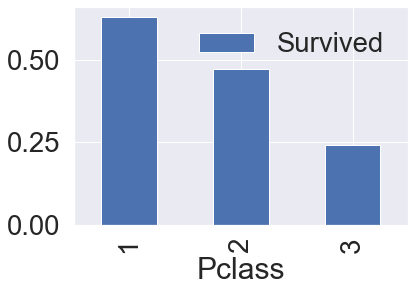

In [55]:
# 각 클래스별 생존률 구하기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

> Pclass가 좋을수록 생존률이 높다.

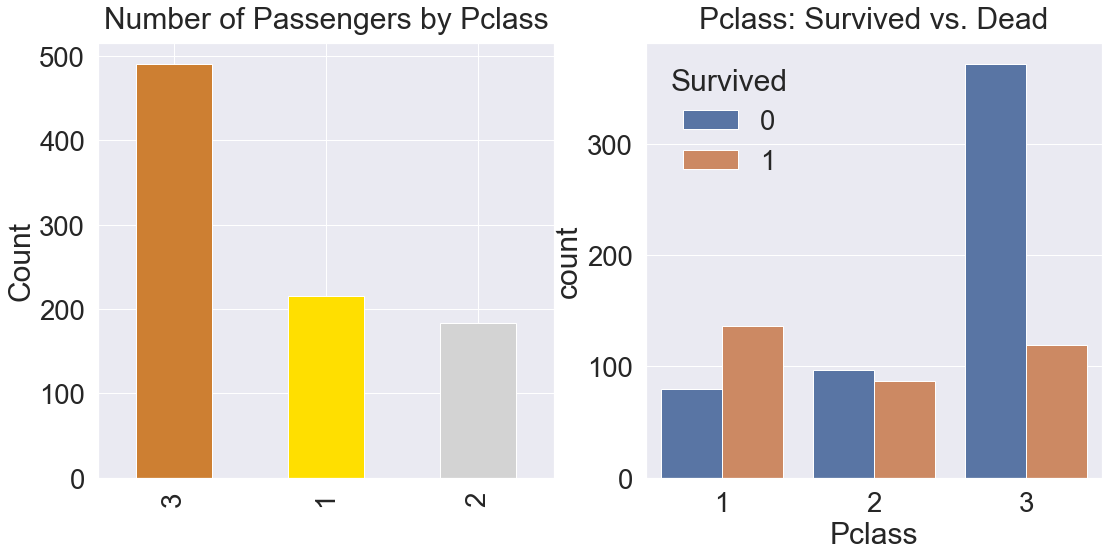

In [59]:
y_position=1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)
plt.show()

> - Pclass별 사람의 수는 3>1>2 순으로 많다.
> - 하지만 생존률을 확인해보면 1>2>3 순으로 높다.
> - 생존에 Pclass가 큰 영향을 미친다 생각할 수 있다.

### 2.2 Sex
- 성별로 생존률이 어떻게 달라지는지 확인하기

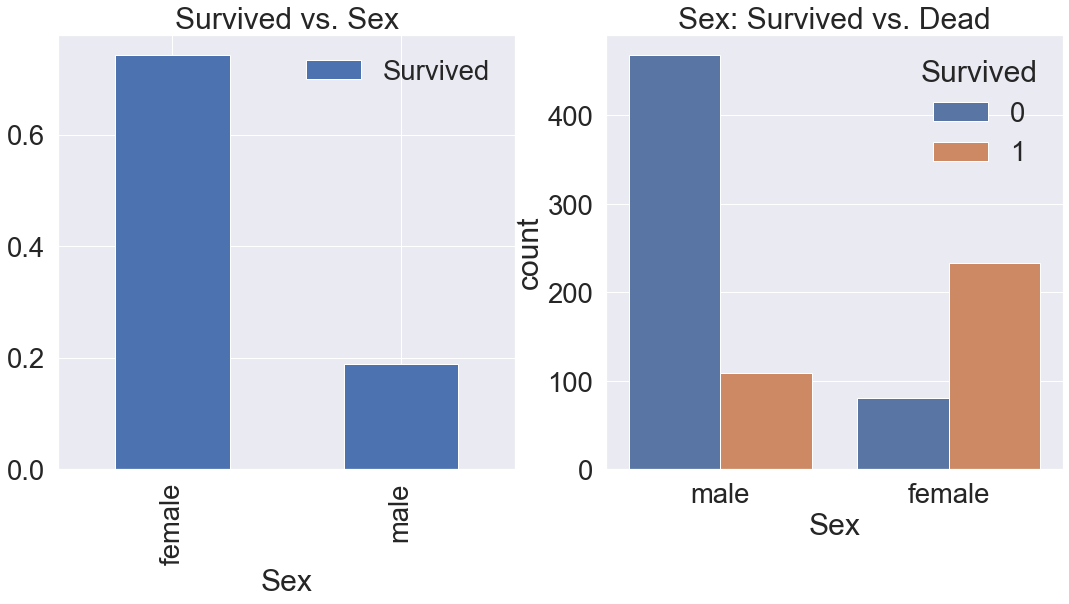

In [69]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

> 여자의 생존률이 월등히 높다.

In [72]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [73]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


> Pclass와 마찬가지로 Sex도 중요한 feature일 것이다.

### 2.3 Both Sex and Pclass
- Sex와 Pclass를 모두 고려한 Survived 분포 살펴보기
> `factorplot`: 손쉽게 3개의 차원으로 이루어진 그래프 그릴 수 있음

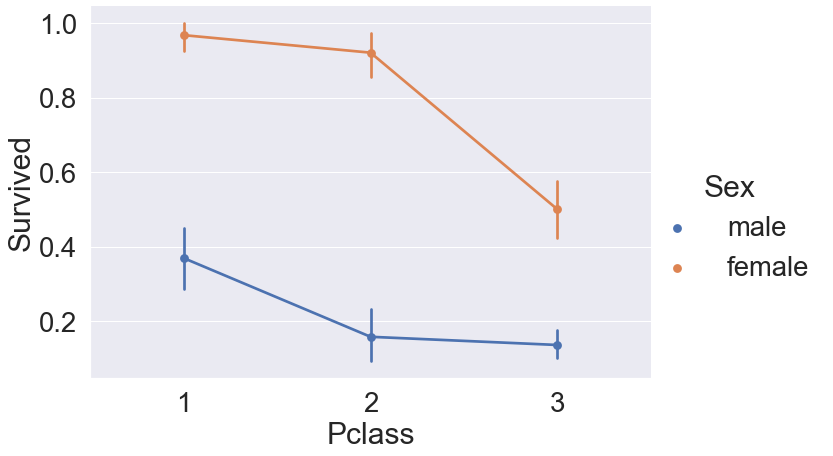

In [82]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train,
              size=6, aspect=1.5)

> - 모든 클래스에서 여자가 남자보다 살 확률이 높음
> - 여자, 남자 모두 1>2>3 순으로 클래스가 높으면 살 확률이 높음

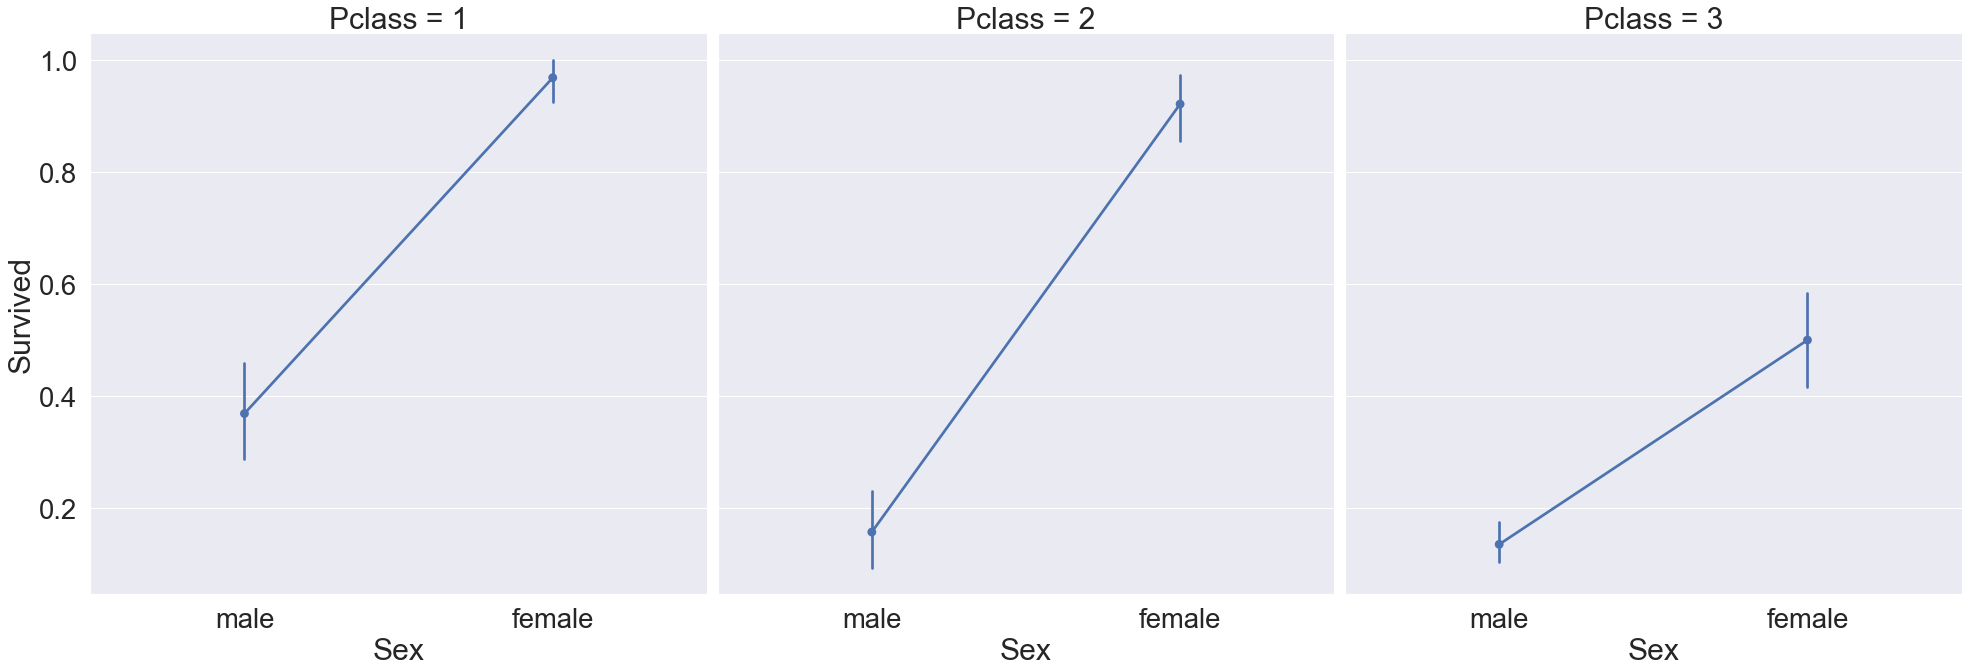

In [78]:
# hue 대신 column으로 한다면
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
              size=9, aspect=1)